# Netflix Viewership
### Allison Biediger
### DSC 640
***


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df1 = pd.read_csv('all_weeks_global_netflix.csv')
df2 = pd.read_csv('all_weeks_countries_netflix.csv')
df3 = pd.read_csv('most_popular_netflix.csv')


In [4]:
# Merge datasets
merged_data = pd.merge(df1, df2, on=['week', 'category', 'show_title', 'season_title'], how='outer')
merged_data = pd.merge(merged_data, df3, on=['show_title', 'season_title'], how='outer')


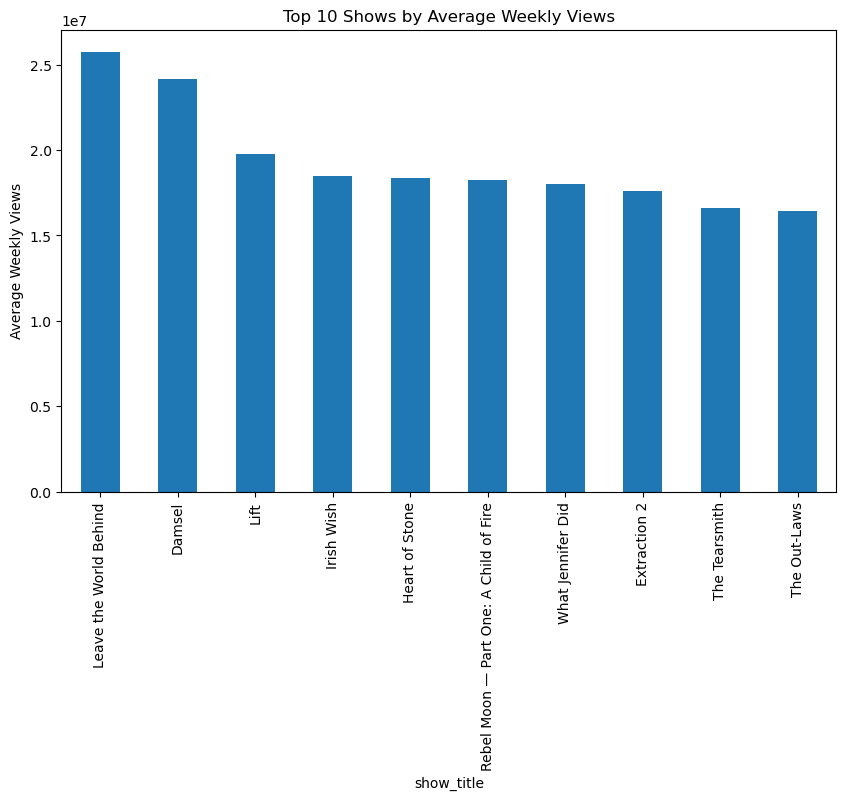

In [16]:
# Shows with the highest average views
top_shows = merged_data.groupby('show_title')['weekly_views'].mean().sort_values(ascending=False).head(10)

# Visualize top shows by weekly views
top_shows.plot(kind='bar', figsize=(10, 6), title='Top 10 Shows by Average Weekly Views')
plt.ylabel('Average Weekly Views')
plt.show()

In [23]:
df2.columns

Index(['country_name', 'country_iso2', 'week', 'category', 'weekly_rank',
       'show_title', 'season_title', 'cumulative_weeks_in_top_10'],
      dtype='object')

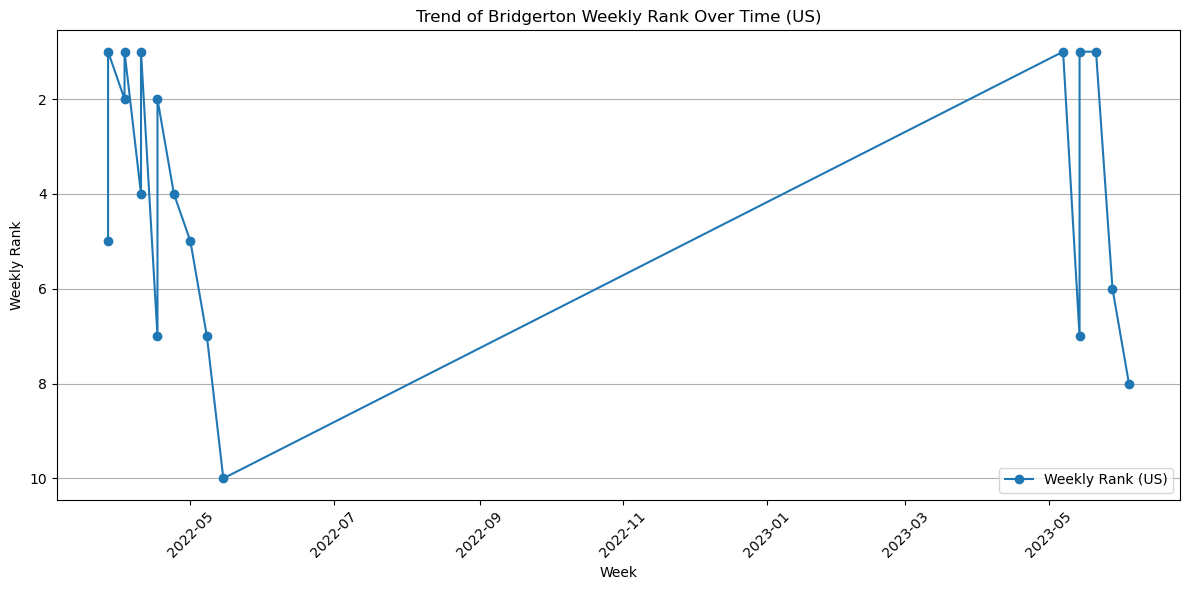

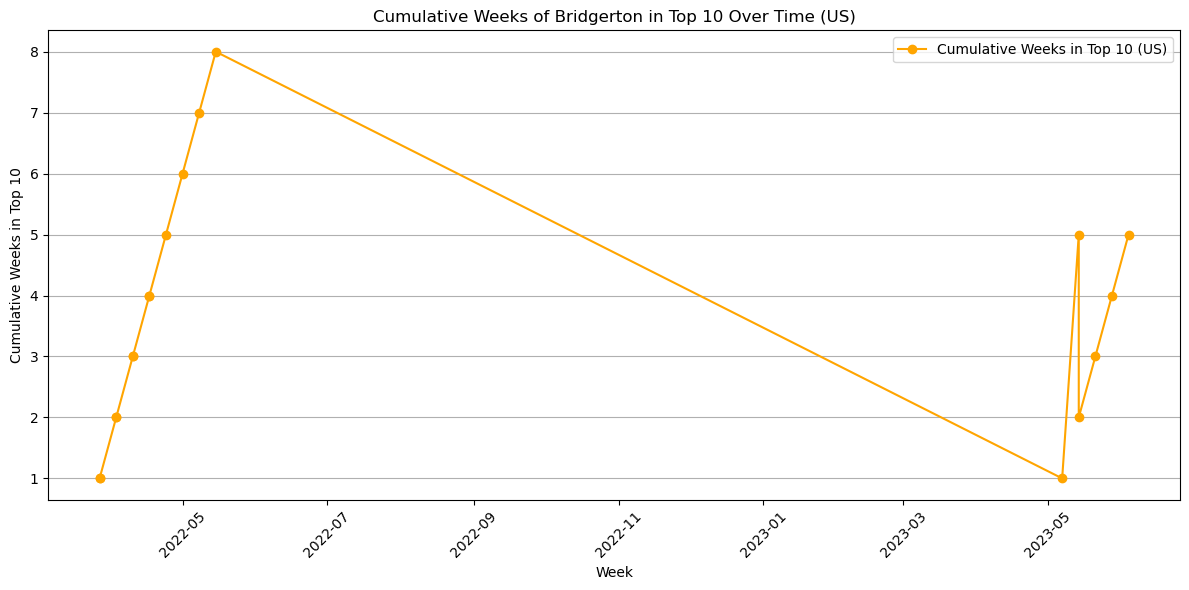

In [33]:
# Filter for Bridgerton and United States in df2
bridgerton_us_df2 = df2[
    (df2['country_name'] == 'United States') &
    (df2['show_title'].str.contains('Bridgerton', case=False, na=False))
]

# Sort by week to analyze trends over time
bridgerton_us_df2 = bridgerton_us_df2.sort_values(by='week')

# Plot Weekly Rank Trend in the US
plt.figure(figsize=(12, 6))
plt.plot(bridgerton_us_df2['week'], bridgerton_us_df2['weekly_rank'], marker='o', label='Weekly Rank (US)')
plt.title('Trend of Bridgerton Weekly Rank Over Time (US)')
plt.xlabel('Week')
plt.ylabel('Weekly Rank')
plt.gca().invert_yaxis()  # Invert y-axis because lower rank is better
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Cumulative Weeks in Top 10 in the US
plt.figure(figsize=(12, 6))
plt.plot(bridgerton_us_df2['week'], bridgerton_us_df2['cumulative_weeks_in_top_10'], marker='o', color='orange', label='Cumulative Weeks in Top 10 (US)')
plt.title('Cumulative Weeks of Bridgerton in Top 10 Over Time (US)')
plt.xlabel('Week')
plt.ylabel('Cumulative Weeks in Top 10')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


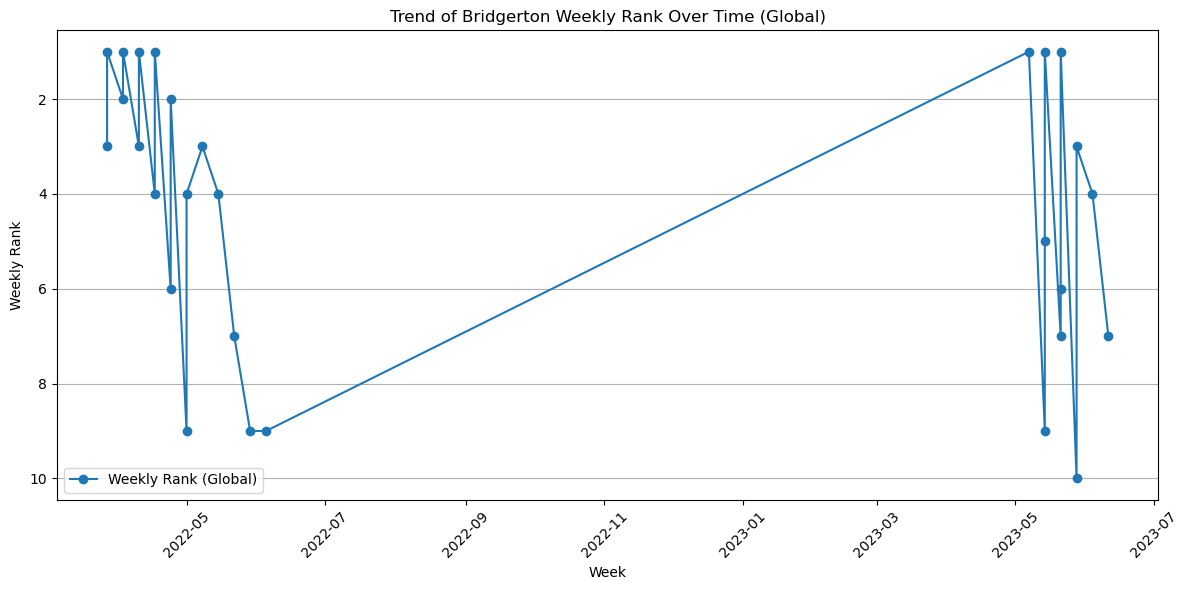

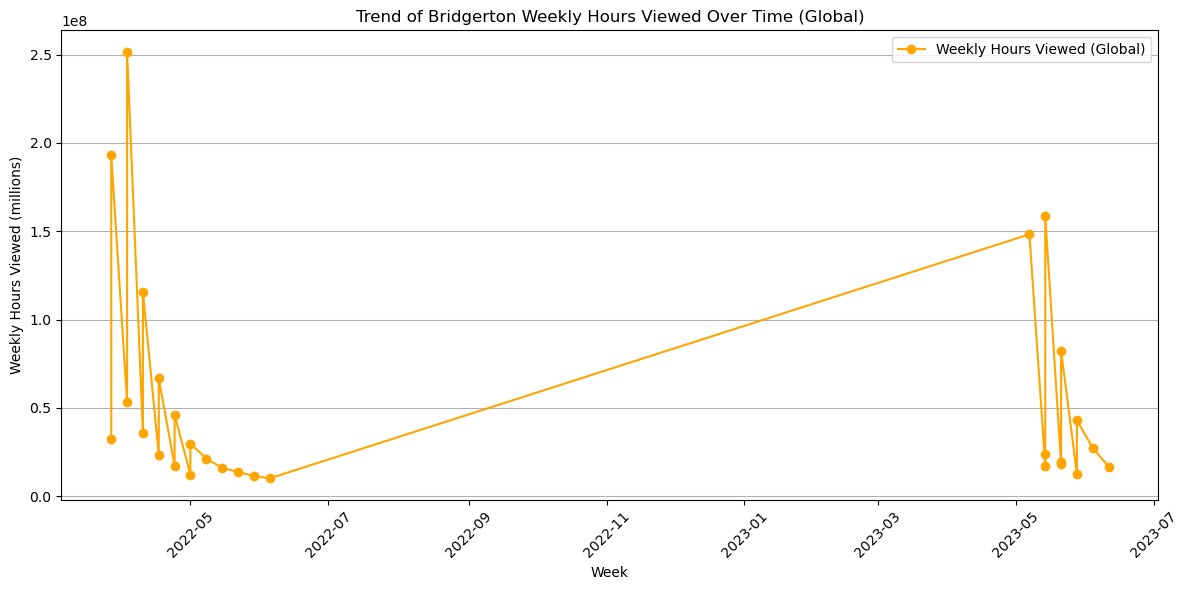

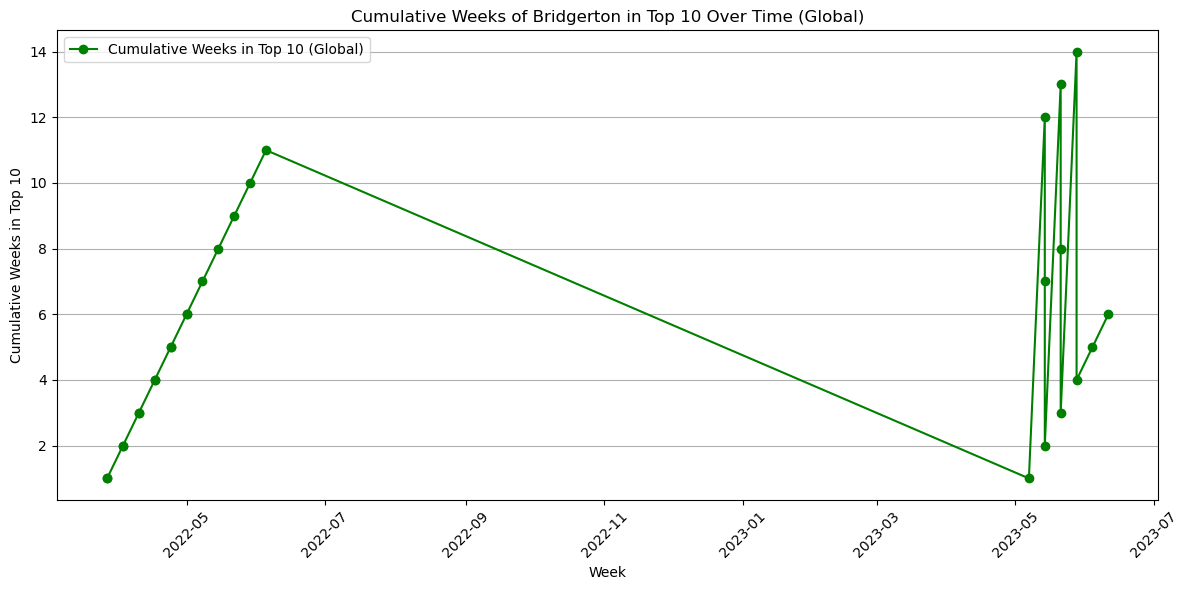

In [35]:
# Filter global data for Bridgerton
bridgerton_global = df1[
    df1['show_title'].str.contains('Bridgerton', case=False, na=False)
]

# Sort by week to analyze trends
bridgerton_global = bridgerton_global.sort_values(by='week')

# Plot Weekly Rank Globally
plt.figure(figsize=(12, 6))
plt.plot(bridgerton_global['week'], bridgerton_global['weekly_rank'], marker='o', label='Weekly Rank (Global)')
plt.title('Trend of Bridgerton Weekly Rank Over Time (Global)')
plt.xlabel('Week')
plt.ylabel('Weekly Rank')
plt.gca().invert_yaxis()  # Invert y-axis because lower rank is better
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Weekly Hours Viewed Globally
plt.figure(figsize=(12, 6))
plt.plot(bridgerton_global['week'], bridgerton_global['weekly_hours_viewed'], marker='o', color='orange', label='Weekly Hours Viewed (Global)')
plt.title('Trend of Bridgerton Weekly Hours Viewed Over Time (Global)')
plt.xlabel('Week')
plt.ylabel('Weekly Hours Viewed (millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Cumulative Weeks in Top 10 Globally
plt.figure(figsize=(12, 6))
plt.plot(bridgerton_global['week'], bridgerton_global['cumulative_weeks_in_top_10'], marker='o', color='green', label='Cumulative Weeks in Top 10 (Global)')
plt.title('Cumulative Weeks of Bridgerton in Top 10 Over Time (Global)')
plt.xlabel('Week')
plt.ylabel('Cumulative Weeks in Top 10')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


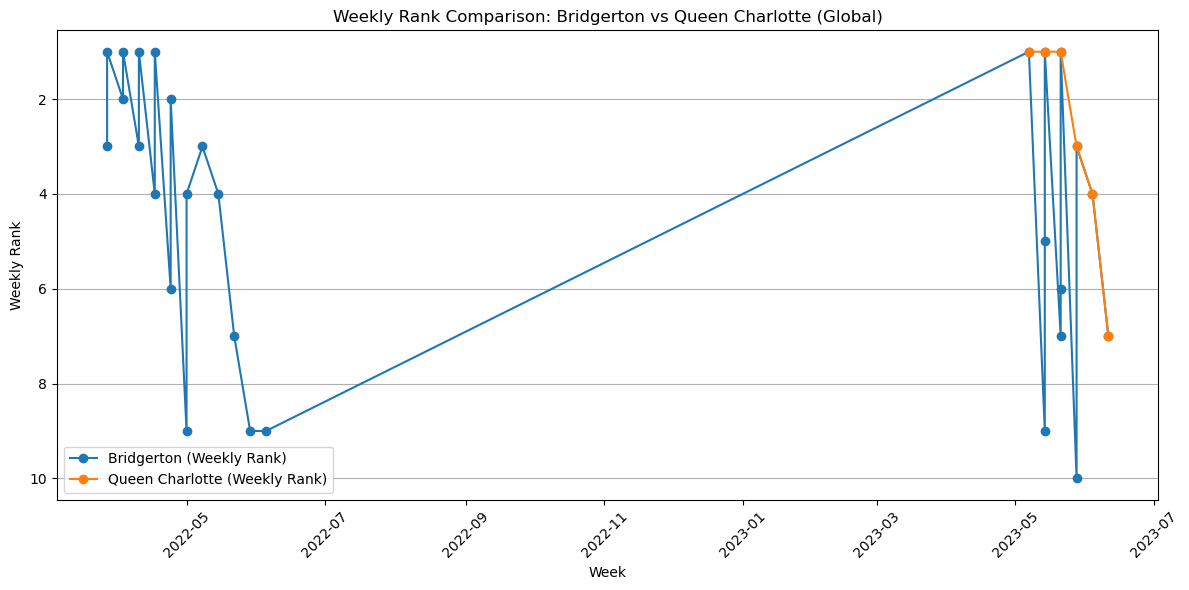

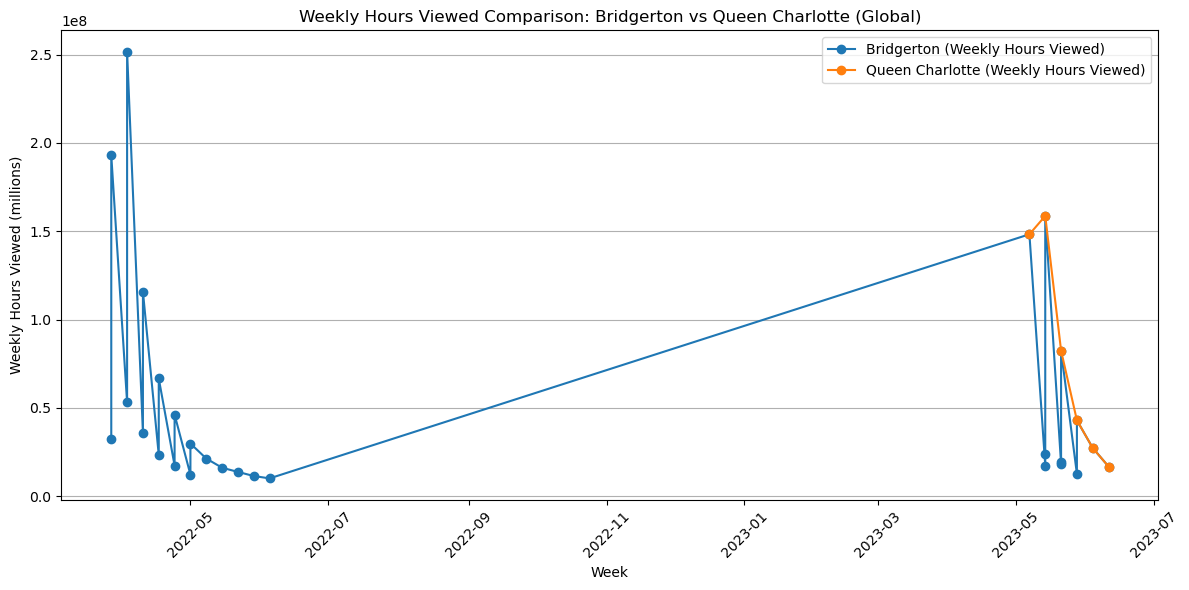

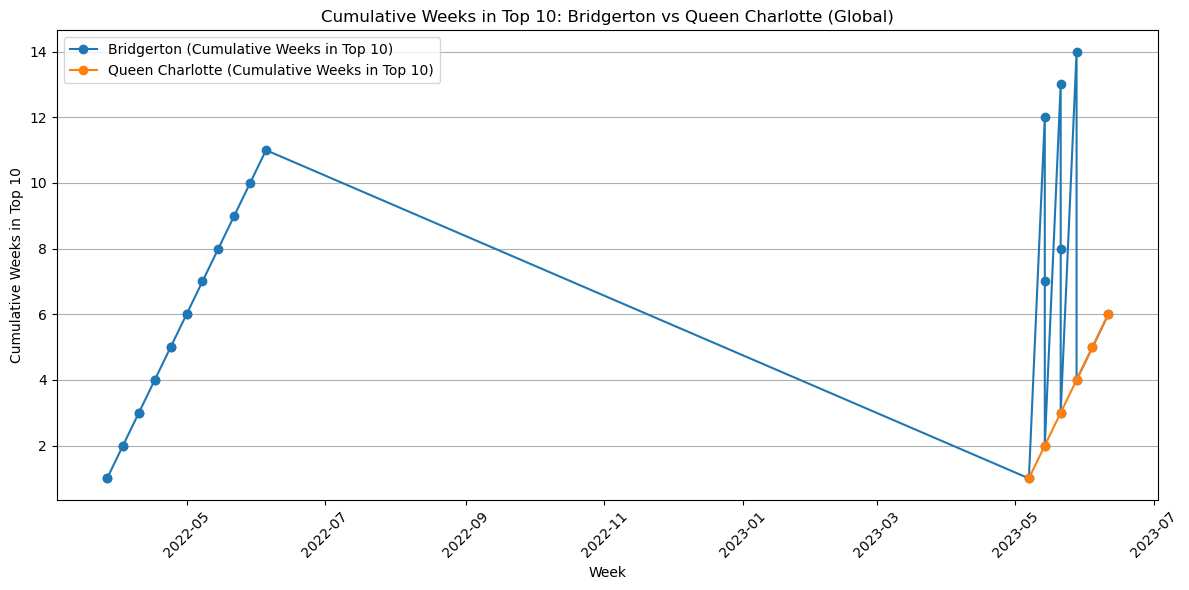

In [37]:
# Filter global data for Bridgerton and Queen Charlotte
filtered_shows_global = df1[
    df1['show_title'].str.contains('Bridgerton|Queen Charlotte', case=False, na=False)
]

# Split data for individual shows
bridgerton_global = filtered_shows_global[
    filtered_shows_global['show_title'].str.contains('Bridgerton', case=False, na=False)
]
queen_charlotte_global = filtered_shows_global[
    filtered_shows_global['show_title'].str.contains('Queen Charlotte', case=False, na=False)
]

# Sort both by week
bridgerton_global = bridgerton_global.sort_values(by='week')
queen_charlotte_global = queen_charlotte_global.sort_values(by='week')

# Plot Weekly Rank Comparison
plt.figure(figsize=(12, 6))
plt.plot(bridgerton_global['week'], bridgerton_global['weekly_rank'], marker='o', label='Bridgerton (Weekly Rank)')
plt.plot(queen_charlotte_global['week'], queen_charlotte_global['weekly_rank'], marker='o', label='Queen Charlotte (Weekly Rank)')
plt.title('Weekly Rank Comparison: Bridgerton vs Queen Charlotte (Global)')
plt.xlabel('Week')
plt.ylabel('Weekly Rank')
plt.gca().invert_yaxis()  # Lower rank is better
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Weekly Hours Viewed Comparison
plt.figure(figsize=(12, 6))
plt.plot(bridgerton_global['week'], bridgerton_global['weekly_hours_viewed'], marker='o', label='Bridgerton (Weekly Hours Viewed)')
plt.plot(queen_charlotte_global['week'], queen_charlotte_global['weekly_hours_viewed'], marker='o', label='Queen Charlotte (Weekly Hours Viewed)')
plt.title('Weekly Hours Viewed Comparison: Bridgerton vs Queen Charlotte (Global)')
plt.xlabel('Week')
plt.ylabel('Weekly Hours Viewed (millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Cumulative Weeks in Top 10 Comparison
plt.figure(figsize=(12, 6))
plt.plot(bridgerton_global['week'], bridgerton_global['cumulative_weeks_in_top_10'], marker='o', label='Bridgerton (Cumulative Weeks in Top 10)')
plt.plot(queen_charlotte_global['week'], queen_charlotte_global['cumulative_weeks_in_top_10'], marker='o', label='Queen Charlotte (Cumulative Weeks in Top 10)')
plt.title('Cumulative Weeks in Top 10: Bridgerton vs Queen Charlotte (Global)')
plt.xlabel('Week')
plt.ylabel('Cumulative Weeks in Top 10')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


In [38]:
df3.columns

Index(['category', 'rank', 'show_title', 'season_title',
       'hours_viewed_first_91_days', 'runtime', 'views_first_91_days'],
      dtype='object')

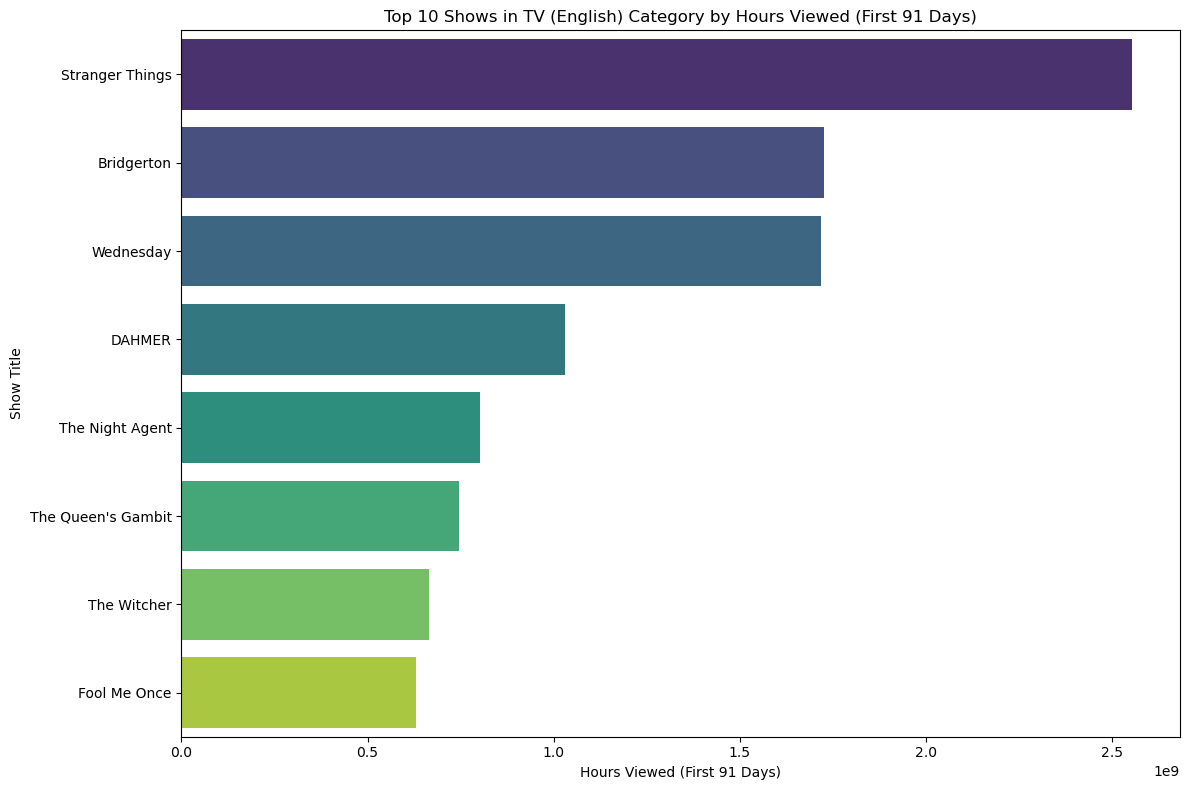

In [46]:
# Aggregate the data by show_title and sum the hours_viewed_first_91_days
aggregated_df3 = tv_english_df3.groupby('show_title')['hours_viewed_first_91_days'].sum().reset_index()

# Sort the data by hours_viewed_first_91_days in descending order and get top 10
top_10_tv_english_aggregated = aggregated_df3.sort_values(by='hours_viewed_first_91_days', ascending=False).head(10)

# Create a bar plot for the top 10 shows in the TV (English) category
plt.figure(figsize=(12, 8))
sns.barplot(x='hours_viewed_first_91_days', y='show_title', data=top_10_tv_english_aggregated, palette='viridis')
plt.title('Top 10 Shows in TV (English) Category by Hours Viewed (First 91 Days)')
plt.xlabel('Hours Viewed (First 91 Days)')
plt.ylabel('Show Title')
plt.tight_layout()
plt.show()
